In [3]:
import pandas as pd

# Read the csv file
data = pd.read_csv('training_90.csv')



INTP    22452
INTJ    20198
INFJ    13448
INFP    10933
ENTP    10538
ENFP     5581
ISTP     3071
ENTJ     2642
ESTP     1800
ENFJ     1376
ISTJ     1129
ISFP      796
ISFJ      592
ESTJ      432
ESFP      324
ESFJ      148
Name: type, dtype: int64


<AxesSubplot:>

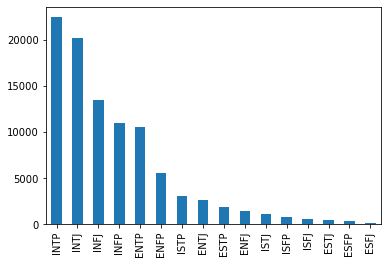

In [4]:
print(data['type'].value_counts())
data['type'].value_counts().plot.bar(x='type', y='Frequency')

In [5]:
value_counts = data['type'].value_counts()
counts_without_outliers = list(value_counts)[2:-2]
counts_average = sum(counts_without_outliers)/len(counts_without_outliers)
print(counts_average) 

a_tenth_of_majority = counts_average / 5
ten_times_of_minority = counts_average * 2

4361.5


         0
INTP  8723
INTJ  7847
INFJ  5224
INFP  4247
ENTP  4094
ENFP  5581
ISTP  3071
ENTJ  2642
ESTP  1800
ENFJ  1376
ISTJ  1129
ISFP  1031
ISFJ   990
ESTJ   958
ESFP   937
ESFJ   901


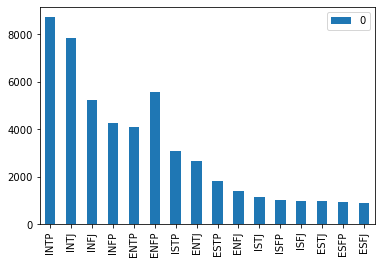

In [6]:
import math 

new_value_counts = []

for value in value_counts:
    if value > ten_times_of_minority:
        value = value*ten_times_of_minority/value_counts[0]
    elif value < a_tenth_of_majority:
        value = a_tenth_of_majority + 1/5 * value
    new_value_counts.append(int(value))


new_value_counts_df = pd.DataFrame(new_value_counts, index = value_counts.index)


new_value_counts_df.plot.bar()
print(new_value_counts_df)

In [7]:

balanced_data = pd.DataFrame()
for type in new_value_counts_df.index:
    sample_size = new_value_counts_df[new_value_counts_df.index == type].values[0][0]

    data_of_type = data[data["type"] == type]
    sampled_data = pd.DataFrame()

    if len(data_of_type) >= sample_size:
        sampled_data = data_of_type.sample(n = sample_size)
    else:
        sampled_data = data_of_type.sample(n = sample_size, replace=True)
    
    balanced_data = pd.concat([balanced_data, sampled_data])
print(balanced_data)

                                                   posts  type
43369  also would host refugee work settle country am...  INTP
45647  get get maybe stem social science major femini...  INTP
2202   correlation able produce captivate fiction med...  INTP
23232  logical construct base assumption order set ba...  INTP
52614  inappropriate woman commune satan well good tr...  INTP
...                                                  ...   ...
77594  grow typical introvert never boatload friend a...  ESFJ
49924  anna netrebko voice unique voice sound shrill ...  ESFJ
9998   though especially hard winter still dark bed w...  ESFJ
61309  people conform gon na comment remember tl r ad...  ESFJ
10178  act rational irrational emotional state nothin...  ESFJ

[50551 rows x 2 columns]


INTP    8723
INTJ    7847
ENFP    5581
INFJ    5224
INFP    4247
ENTP    4094
ISTP    3071
ENTJ    2642
ESTP    1800
ENFJ    1376
ISTJ    1129
ISFP    1031
ISFJ     990
ESTJ     958
ESFP     937
ESFJ     901
Name: type, dtype: int64


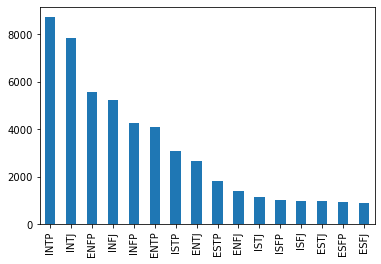

In [8]:
print(balanced_data['type'].value_counts())
balanced_data['type'].value_counts().plot.bar(x='type', y='Frequency')
balanced_data.to_csv("training_90_string_balanced.csv", index=False)

In [20]:
print(balanced_data['type'])

43369    INTP
45647    INTP
2202     INTP
23232    INTP
52614    INTP
         ... 
77594    ESFJ
49924    ESFJ
9998     ESFJ
61309    ESFJ
10178    ESFJ
Name: type, Length: 50551, dtype: object


In [23]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True)

splits = []
for train_indexes, test_indexes in kf.split(balanced_data, balanced_data['type']):
    splits.append({'train': train_indexes, 'test': test_indexes})
    print("TRAIN:", train_indexes, "TEST:", test_indexes)

print(splits)


TRAIN: [    0     1     2 ... 50548 50549 50550] TEST: [   23    30    36 ... 50528 50529 50539]
TRAIN: [    0     2     4 ... 50547 50548 50549] TEST: [    1     3     8 ... 50542 50546 50550]
TRAIN: [    1     2     3 ... 50548 50549 50550] TEST: [    0     4     5 ... 50508 50532 50537]
TRAIN: [    0     1     3 ... 50547 50548 50550] TEST: [    2     6     7 ... 50544 50545 50549]
TRAIN: [    0     1     2 ... 50546 50549 50550] TEST: [   15    18    22 ... 50543 50547 50548]
[{'train': array([    0,     1,     2, ..., 50548, 50549, 50550]), 'test': array([   23,    30,    36, ..., 50528, 50529, 50539])}, {'train': array([    0,     2,     4, ..., 50547, 50548, 50549]), 'test': array([    1,     3,     8, ..., 50542, 50546, 50550])}, {'train': array([    1,     2,     3, ..., 50548, 50549, 50550]), 'test': array([    0,     4,     5, ..., 50508, 50532, 50537])}, {'train': array([    0,     1,     3, ..., 50547, 50548, 50550]), 'test': array([    2,     6,     7, ..., 50544, 50545, 